The shapes...X.shape=(200, 2), (X.T)[0].shape=(200,)

Biased..
cov_mat(X.T)  =
[[ 6.39861053 -5.12863772]
 [-5.12863772  7.99190378]]

np.cov(X.T) =
[[ 6.39861053 -5.12863772]
 [-5.12863772  7.99190378]]

Unbiased..
cov_mat(X.T)  =
[[ 6.43076435 -5.15440977]
 [-5.15440977  8.0320641 ]]

np.cov(X.T) =
[[ 6.43076435 -5.15440977]
 [-5.15440977  8.0320641 ]]


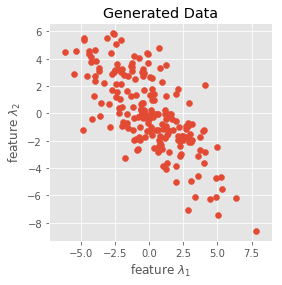

In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from libitmal import utils as itmalutils

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    import os
    path = os.path.join("/home/cef/", fig_id + "." + fig_extension) 
    print(f"Saving figure to file '{path}'")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (4, 4)

# Normal distributed x and y vector with mean 0 and standard deviation 1
N=200
x = np.random.normal(0, 2, N)
y = np.random.normal(0, 1, N)
X = np.vstack((x, y)).T

# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Rotation matrix
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# Transformation matrix
T = Scale.dot(Rot)

# Apply transformation matrix to X
Y = X.dot(T)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Generated Data')
plt.axis('equal');
plt.xlabel('feature $\lambda_1$')
plt.ylabel('feature $\lambda_2$')
#save_fig('covariance') 

# Covariance
def cov(x, y, bias=True):
    xbar, ybar = x.mean(), y.mean()
    if bias:
        n=len(x)
    else: 
        n=len(x) - 1
    assert n>0
    return np.sum((x - xbar)*(y - ybar))/n

# Covariance matrix
def cov_mat(X, bias=True):
    return np.array([[cov(X[0], X[0], bias), cov(X[0], X[1], bias)], \
                     [cov(X[1], X[0], bias), cov(X[1], X[1], bias)]])

print(f'The shapes...X.shape={X.shape}, (X.T)[0].shape={(X.T)[0].shape}')

# Calculate covariance matrix
C0_biased=cov_mat  (Y.T, bias=True)
C1_biased=np.cov   (Y.T, bias=True, rowvar=True)
C0_unbiased=cov_mat(Y.T, bias=False)
C1_unbiased=np.cov (Y.T, bias=False,rowvar=True)

print('\nBiased..')
print(f'cov_mat(X.T)  =\n{C0_biased}')
print(f'\nnp.cov(X.T) =\n{C1_biased}')

print('\nUnbiased..')
print(f'cov_mat(X.T)  =\n{C0_unbiased}')
print(f'\nnp.cov(X.T) =\n{C1_unbiased}')

itmalutils.AssertInRange(C0_biased,  C1_biased)
itmalutils.AssertInRange(C0_unbiased,C1_unbiased)

The shapes...X.shape=(200, 2), (X.T)[0].shape=(200,)

Biased..
cov_mat(X.T)  =
[[14.03700628  0.2024084 ]
 [ 0.2024084   1.73415365]]

np.cov(X.T) =
[[14.03700628  0.2024084 ]
 [ 0.2024084   1.73415365]]

Unbiased..
cov_mat(X.T)  =
[[14.107544    0.20342553]
 [ 0.20342553  1.74286799]]

np.cov(X.T) =
[[14.107544    0.20342553]
 [ 0.20342553  1.74286799]]


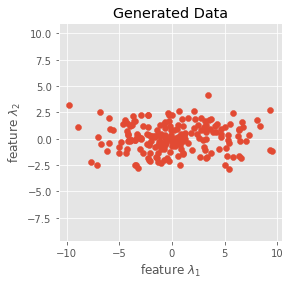